In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
df = pd.read_csv('Social_Network_Ads.csv')

In [394]:
df 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [396]:
df = df.iloc[:,2:]

In [398]:
df.sample(5)

,Age,EstimatedSalary,Purchased
340,53,104000,1
95,35,44000,0
245,51,146000,1
204,58,101000,1
69,31,68000,0


In [400]:
df.shape

(400, 3)

# TRAIN TEST SPLIT --------------------------->

In [402]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1),
                                                      df['Purchased'],test_size = 0.3 ,random_state = 0)

X_train.shape , X_test.shape

((280, 2), (120, 2))

# STANDARD SCALAR ------------------------------------------>

In [406]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set , it will learn the parameters--------------->
scaler.fit(X_train)

# transform train and test sets----------->
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note => transform karne ke liye hmne DataFrame bheja tha lekin transform hone ke baad ye numpy array return karega.

In [32]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [408]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [410]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [412]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [414]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [416]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [418]:
np.round(X_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


# EFFECT OF SCALING ------------------------------------------------------->

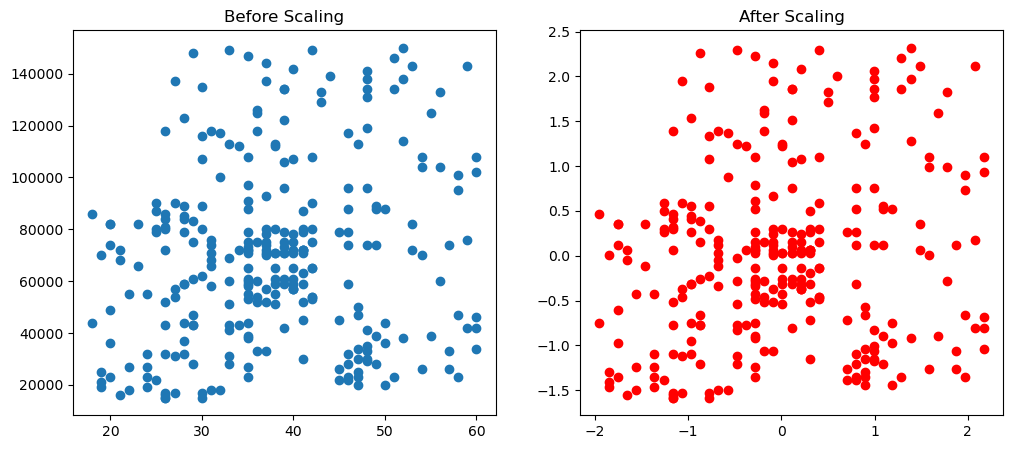

In [422]:
fig,(ax1,ax2) = plt.subplots(ncols =2, figsize =(12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

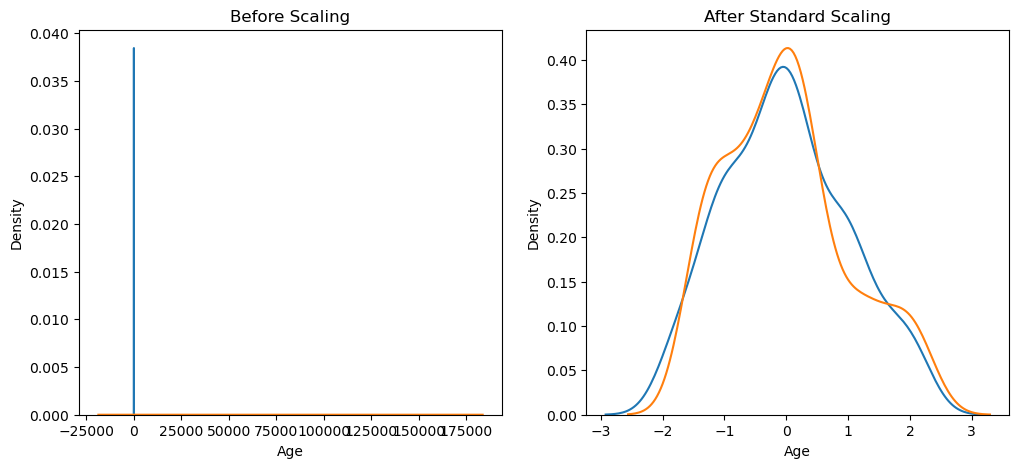

In [424]:
fig,(ax1,ax2) = plt.subplots(ncols =2, figsize =(12,5))

# BEFORE SCALING --------------------------------->
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

# AfteR SCALING --------------------------------->
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)

plt.show()

# Comparison Of Distributions ------------------------>

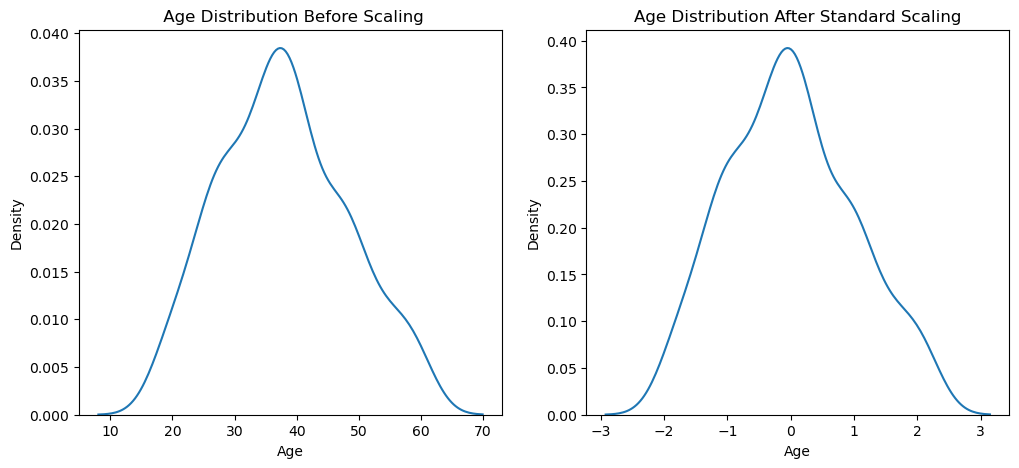

In [426]:
fig, (ax1 , ax2) = plt.subplots(ncols = 2,figsize = (12,5)) 

# BEFORE SCALING --------------------------------->
ax1.set_title(" Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

# AfteR SCALING --------------------------------->
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

plt.show()

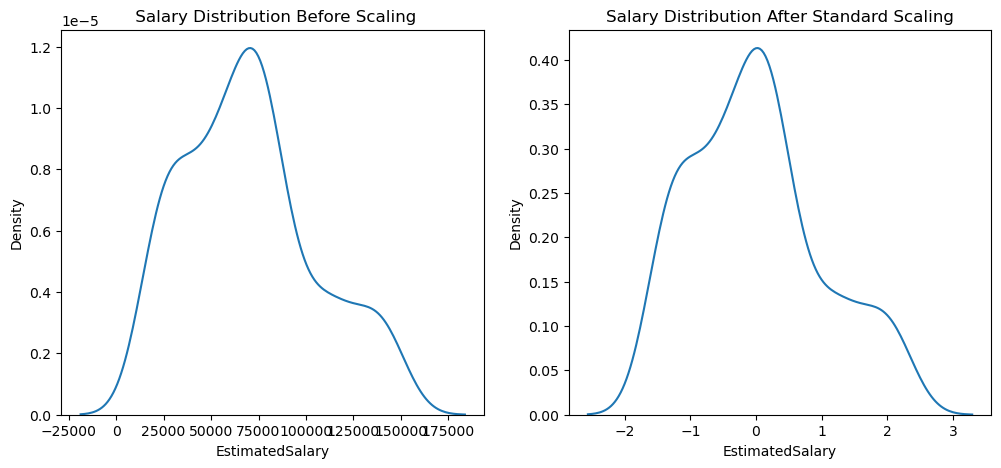

In [428]:
fig, (ax1 , ax2) = plt.subplots(ncols = 2,figsize = (12,5)) 

# BEFORE SCALING --------------------------------->
ax1.set_title(" Salary Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# AFTER SCALING --------------------------------->
ax2.set_title("Salary Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Why Scaling is Important ?

In [430]:
from sklearn.linear_model import LogisticRegression

In [432]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [434]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [436]:
y_pred = lr.predict(X_test) 
y_pred_scaled = lr_scaled.predict(X_test_scaled) 

In [492]:
from sklearn.metrics import accuracy_score

In [494]:
print("Actual" , accuracy_score(y_test , y_pred))
print("Scaled" , accuracy_score(y_test , y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8583333333333333


In [496]:
from sklearn.tree import DecisionTreeClassifier

In [498]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [500]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [502]:
y_pred = dt.predict(X_test) 
y_pred_scaled = dt_scaled.predict(X_test_scaled) 

In [504]:
from sklearn.metrics import accuracy_score

In [506]:
print("Actual" , accuracy_score(y_test , y_pred))
print("Scaled" , accuracy_score(y_test , y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [508]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# EFFECT OF OUTLIER

In [510]:
# Inserted the Outliers---------------->


# df = df.append(pd.DataFrame({'Age':[5,80,95],'EstimatedSalary':[1000,250000,300000],'Purchased':[0,1,1]}))

# ❌ .append() has been removed from pandas version 2.0+


# df is already defined
new_data = pd.DataFrame({
    'Age': [5, 86, 95],
    'EstimatedSalary': [1000, 250000, 300000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)


In [526]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,86,250000,1


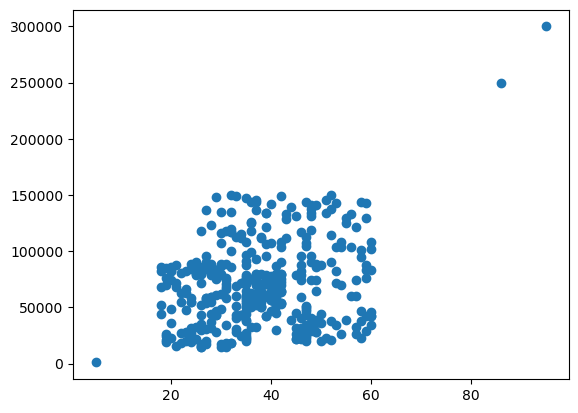

In [528]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [530]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1),
                                                      df['Purchased'],test_size = 0.3 ,random_state = 0)

X_train.shape , X_test.shape

((282, 2), (121, 2))

In [532]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set , it will learn the parameters--------------->
scaler.fit(X_train)

# transform train and test sets----------->
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [534]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

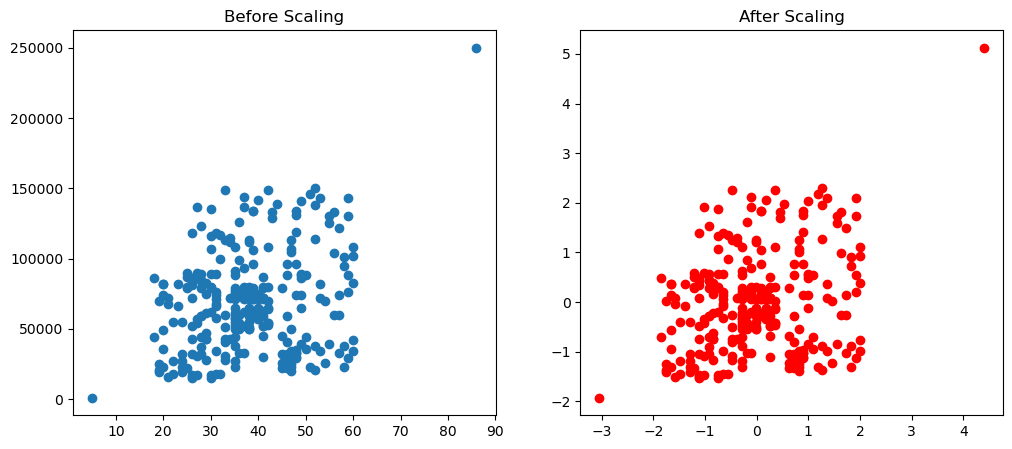

In [536]:
fig,(ax1,ax2) = plt.subplots(ncols =2, figsize =(12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()